<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1. Import Necessary Libraries

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset (insurance.csv) and read into DataFrame:

In [303]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Performing Basic EDA :

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Shape of data :

In [304]:
df.shape # shows no. of rows and columns in the form (rows, columns)

(1338, 7)

<h3><b>We see that there are 1338 rows and 7 columns in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Summarised Information about the data and the datatypes of each respective attributes.

In [305]:
df.describe() #Shows brief summary of data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [306]:
df.info() #Shows datatypes of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.5 Check the dataset for any missing values

In [307]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [308]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<h3><b>We see that there are no missing or null values in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.6 Five Point Summary :

In [309]:
df.describe() #this will list out EDA Statistics for Numerical Attributes

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Mean

In [310]:
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Median

In [311]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Mode

In [312]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Quantile 25%

In [313]:
print(df.quantile(q=0.25))  # Prints the value below which 25% of the data lies

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Quantile 50%

In [314]:
print(df.quantile(q=0.50))  # Prints the value below which 50% of the data lies

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Quantile 75%

In [315]:
print(df.quantile(q=0.75))  # Prints the value below which 75% of the data lies

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> IQR :

In [316]:
df.quantile(0.75) - df.quantile(0.25) #Displays IQR for all the attributes

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Variance : 

In [317]:
print(df.var()) #Shows how much was the data dispersion

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Standard Deviation : 

In [318]:
print(df.std()) #Shows how much the data deviated from the mean

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Covariance : 

In [319]:
df.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Correlation :

In [320]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<h3><b>Now that we have seen various statistics and measures of the various attributes, and got a fair idea about the data, lets see the distribution of data through visualization. This will visually display the spread and distribution of data, also highlighting the outliers. </b></h3>

<h3><b>This visual representation will not only take into account the five point summary while displaying , but also give a clearer repesentation of spread and also detect outliers</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Distribution of Attributes :

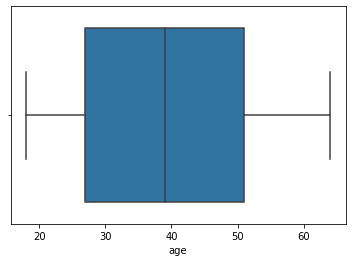

In [321]:
sns.boxplot(df.age)

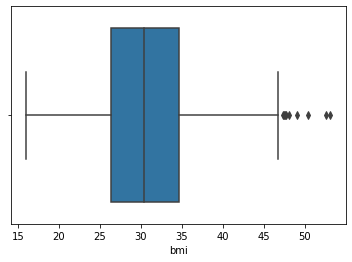

In [322]:
 sns.boxplot(df.bmi) 

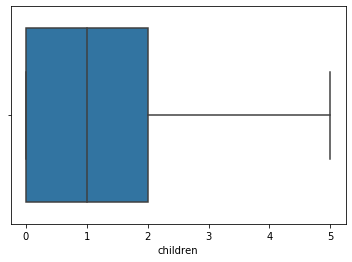

In [323]:
sns.boxplot(df.children)

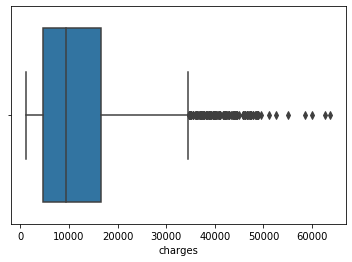

In [324]:
sns.boxplot(df.charges)

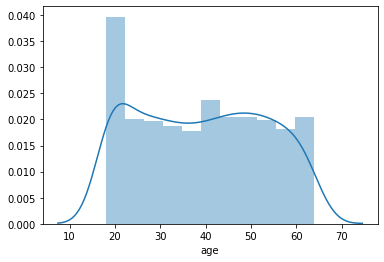

In [325]:
sns.distplot(df.age)

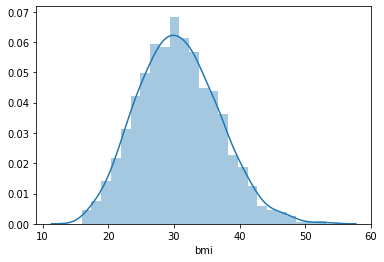

In [326]:
sns.distplot(df.bmi)

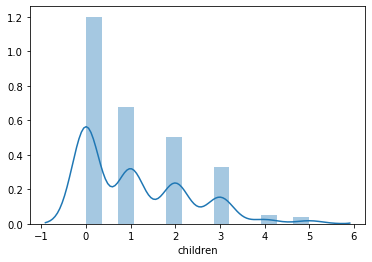

In [327]:
sns.distplot(df.children)

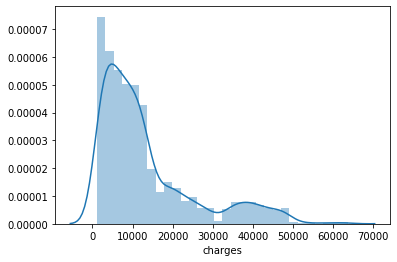

In [328]:
sns.distplot(df.charges)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Check Skewness of the data

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

In [329]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Histogram to check skweness of data :

/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


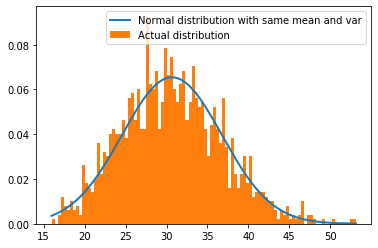

In [330]:
import scipy.stats as stats


h = np.asarray(df['bmi']) #We are only showing for attribute "bmi" here
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9 Checking outliers in the attributes :

<h3><b>We have already seen the outliers detected in above box plots, we can also use scatter plot to visually detect them. Since, we have already visually plotted them, let's now find their actual values here. </b></h3>

In [331]:
def detect_outlier(data_1):
    
    low = np.percentile(data_1, 25)
    high = np.percentile(data_1, 75)
    iqr = high - low
    up_range = high + (1.5 * iqr)
    low_range = low - (1.5 * iqr)
    outliers = []
    for i in data_1:
         if i > up_range or i < low_range:
            outliers.append(i)
   
    return outliers

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Outliers in BMI : 

In [332]:
bmi = []
for i in df.bmi:
    bmi.append(i)
out_bmi = detect_outlier(bmi)

print(out_bmi)

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Outliers in Age : 

In [333]:
age = []
for i in df.age:
    age.append(i)
out_age = detect_outlier(age)

print(out_age)

[]


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Outliers in Charges :

In [334]:
charges = []
for i in df.charges:
    charges.append(i)
out_charges = detect_outlier(charges)

print(out_charges)

[39611.7577, 36837.467000000004, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.837999999996, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.135610000005, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.074479999996, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 44585.45587, 43254.41795,

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Distribution of Categorial Columns (Children, Smoker, Region)

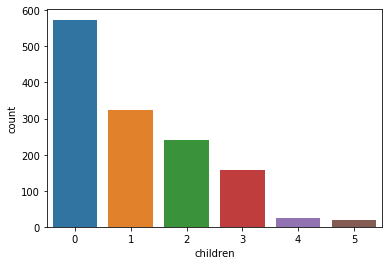

In [335]:
sns.countplot(x ='children', data = df)

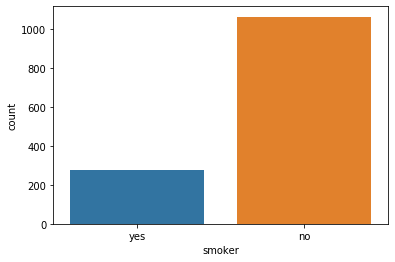

In [336]:
sns.countplot(x ='smoker', data = df)

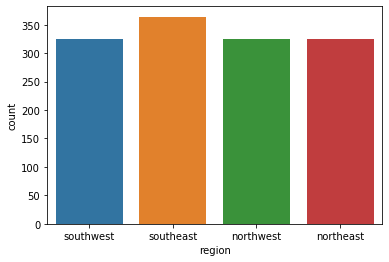

In [337]:
sns.countplot(x ='region', data = df)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.11 Pairplot for the columns :

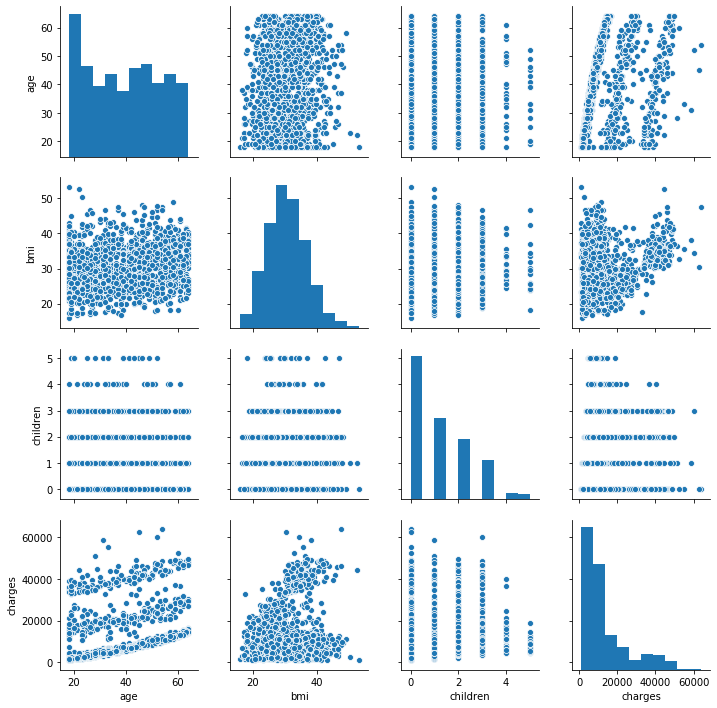

In [338]:
sns.pairplot(df)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.12 Do charges of people who smoke differ significantly from the
people who don't?

Let's do Hypothesis Testing to find statistical evidences:

H0 : Charges of people who smoke are same from those who don't smoke 


HA : Charges of people who smoke are not same from those who don't smoke

Level of significance (alpha) = 0.05

In [339]:
smoker_charges = df[df["smoker"] == "yes"].charges
non_smoker_charges = df[df["smoker"] == "no"].charges

Let us visualize it first, and then we will evalutae it statistically as well.

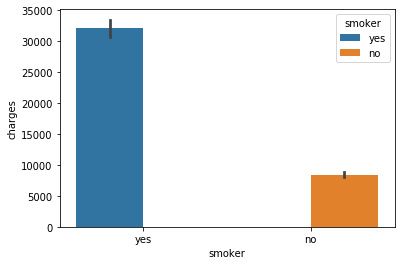

In [340]:
sns.barplot(x = 'smoker', y = 'charges', hue = 'smoker', data = df)

In [341]:
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(t_statistic, p_value)

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant, therefore we reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant, therefore we fail to reject the null hypothesis')

46.664921172723716 8.271435842177219e-283
With a p-value of 0.0 the difference is significant, therefore we reject the null hypothesis


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.12 Does bmi of males differ significantly from that of females?

Let's do Hypothesis Testing to find statistical evidences:

H0 : Variation of BMI of males is same from that of females 


HA : Variation of BMI of males is not same from that of females 

Level of significance (alpha) = 0.05

In [342]:
male_bmi = df[df["sex"] == "male"].bmi
female_bmi = df[df["sex"] == "female"].bmi

Let us visualize it first, and then we will evaluate it statistically.

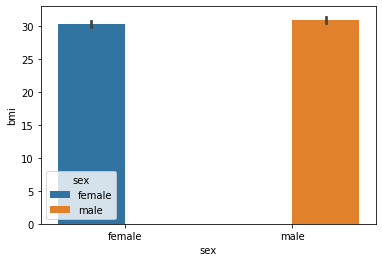

In [343]:
sns.barplot(x = 'sex', y = 'bmi', hue = 'sex', data = df)

In [344]:
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print(t_statistic, p_value)

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant, therefore we reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant, therefore we fail to reject the null hypothesis')

1.696752635752224 0.08997637178984932
With a p-value of 0.09 the difference is not significant, therefore we fail to reject the null hypothesis


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.13 Is the proportion of smokers significantly different in different
genders?

We are doing Test of Proportions here.

Since'sex' and 'smoker' are two categorical variables, we want to see if the proportion of smokers in the female population is significantly less than it is in the male population

H0 = The proportions are equal


HA = The two proportions are not equal

In [345]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] 
n_females = df.sex.value_counts()[1] 
n_males = df.sex.value_counts()[0] 

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


We see that proportions are different, but let's examine are they statistically significant.

In [346]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant, therefore we reject the null hypothesis')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant, therefore we fail to reject the null hypothesis')

With a p-value of 0.0053 the difference is significant, therefore we reject the null hypothesis


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.14 Is the distribution of bmi across women with no children, one child
and two children, the same?

Let's do Hypothesis Testing to find statistical evidences:

H0 : Distribution of bmi across women with no children, one child and two children, is same. 


HA : Distribution of bmi across women with no children, one child and two children, is not same.  

Level of significance (alpha) = 0.05

In [347]:
female_no_children = df[(df["sex"] == "female") & (df["children"] == 0)].bmi
female_one_children = df[(df["sex"] == "female") & (df["children"] == 1)].bmi
female_two_children = df[(df["sex"] == "female") & (df["children"] == 2)].bmi

In [348]:
#We will use One Way ANOVA to examine this scenario
from scipy.stats import f_oneway

f_oneway(female_no_children, female_one_children, female_two_children)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

We can see that, p-value = 0.71 is greater than alpha (0.05), therefore we fail to reject null hypothesis.